The movie industry is a mulit-billion dollar industry with many movies being made. In this notebook we are going to see what makes a movie the most money. Using genres, studios, year, and many other stuff from this dataset.

This notebook features:

- Genre
- Year
- Lead studio
- Audience score

Importing necessary libraries:

In [1]:
import numpy as np
import pandas as pd 
import io
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import plotly.express as px
%matplotlib inline
import seaborn as sns
import pandas_profiling
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import os

In [2]:
df = pd.read_csv('data/HollywoodsMostProfitableStories.csv')
df.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


In [15]:
# report = pandas_profiling.ProfileReport(df)
# from IPython.display import display
# display(report)

In [27]:
print("There are {} films and {} columns in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} different years in this dataset {} \n".format(df.Year.nunique(),
                                                                           ", ".join(df.Film.unique()[0:0])))

print("There are {} different genres in this dataset such as {} \n".format(df.Genre.nunique(),
                                                                                      ", ".join(df.Genre.unique()[0:6])))

There are 74 films and 8 columns in this dataset. 

There are 5 different years in this dataset  

There are 6 different genres in this dataset such as Comedy, Drama, Romance, Animation, Action, Fantasy 



In [23]:
df['Year'].unique()

array([2008, 2009, 2011, 2007, 2010], dtype=int64)

In [5]:
df.describe()

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
count,73.000000,71.000000,73.000000,74.000000,74.000000
mean,64.136986,4.741610,47.356164,136.351979,2009.054054
std,13.647665,8.292017,26.242655,157.067561,1.353756
min,35.000000,0.005000,3.000000,0.025000,2007.000000
25%,52.000000,1.790680,27.000000,32.447500,2008.000000
50%,64.000000,2.642353,45.000000,73.198612,2009.000000
75%,76.000000,4.850958,65.000000,190.185250,2010.000000
max,89.000000,66.934000,96.000000,709.820000,2011.000000


#### Plot set of data:
Shows different of movies like audience scores percent wise, how much many they make and etc.

- Line plots:

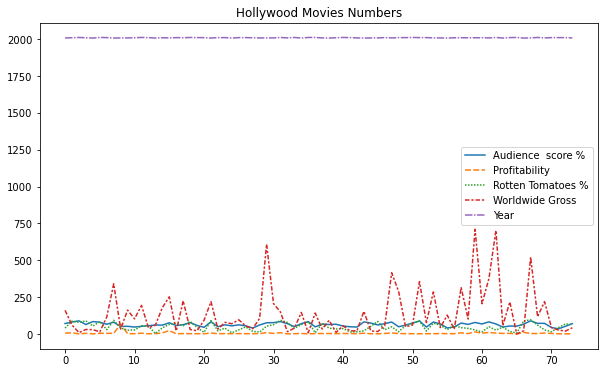

In [6]:
# Set the width and height of the figure
plt.figure(figsize=(10, 6))

# Add title
plt.title("Hollywood Movies Numbers")

# Line chart showing daily global streams of each song 
sns.lineplot(data=df);

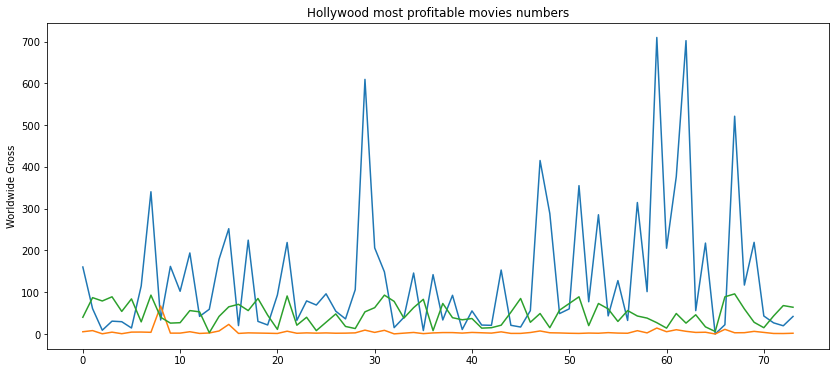

In [7]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Line chart showing Hollywood worldwide gross profits
sns.lineplot(data=df['Worldwide Gross'])

# Line chart showing Hollywood movies audience scores%
#sns.lineplot(data=df['Audience score %'])

# Line chart showing Hollywood movies profitability
sns.lineplot(data=df['Profitability'])

# Line chart showing Hollywood movies rotten tomatoe rating
sns.lineplot(data=df['Rotten Tomatoes %'])

# Add title
plt.title("Hollywood most profitable movies numbers");

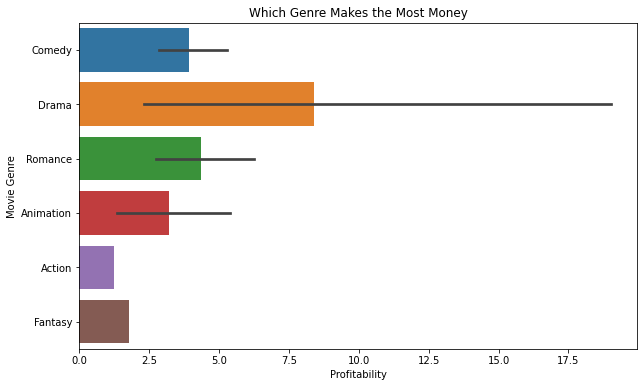

In [8]:
plt.figure(figsize=(10,6))
plt.title('Which Genre Makes the Most Money')
sns.barplot(x=df['Profitability'], y=df['Genre'])
plt.ylabel("Movie Genre");

In [9]:
genre = df.groupby('Genre')
genre.mean().sort_values(by='Profitability', ascending=False).head()

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
Genre,,,,,
Drama,67.230769,8.407218,51.538462,99.011375,2009.384615
Romance,66.857143,4.371398,48.500000,133.542096,2009.266667
Comedy,61.390244,3.935434,43.487805,130.502578,2008.829268
Animation,76.333333,3.216561,80.333333,356.776811,2009.666667
Fantasy,81.000000,1.783944,73.000000,285.431000,2008.000000


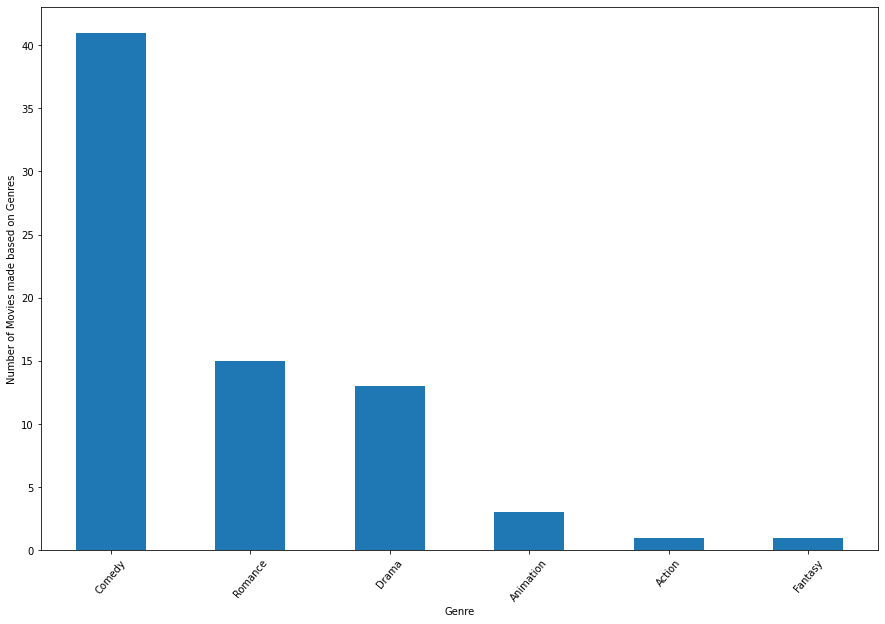

In [10]:
plt.figure(figsize=(15,10))
genre.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel('Genre')
plt.ylabel('Number of Movies made based on Genres')
plt.show();

#### WordCloud:
This word cloud shows which genre has the most movies made from it. Since comedy is the biggest, that means people have made more comedy movies than any other genre.

In [11]:
text = ' '.join(review for review in df['Genre'])
print("There are {} words in the combination of all reviews.".format(len(text)))

There are 529 words in the combination of all reviews.


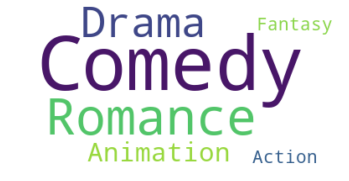

In [12]:
wordCloud = WordCloud(background_color='white').generate(text)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show();

In [13]:
# Lead Studios
ls = df.groupby('Lead Studio')
ls.mean().sort_values(by='Profitability', ascending=False).head()

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
Lead Studio,,,,,
Disney,71.857143,7.406010,65.285714,288.657512,2009.000000
Independent,63.500000,6.582046,47.166667,81.418190,2009.263158
Summit,73.200000,6.377962,39.200000,248.452599,2009.000000
Sony,69.500000,4.836326,52.000000,100.780007,2009.250000
Fox,69.000000,4.511522,51.833333,120.428050,2008.833333


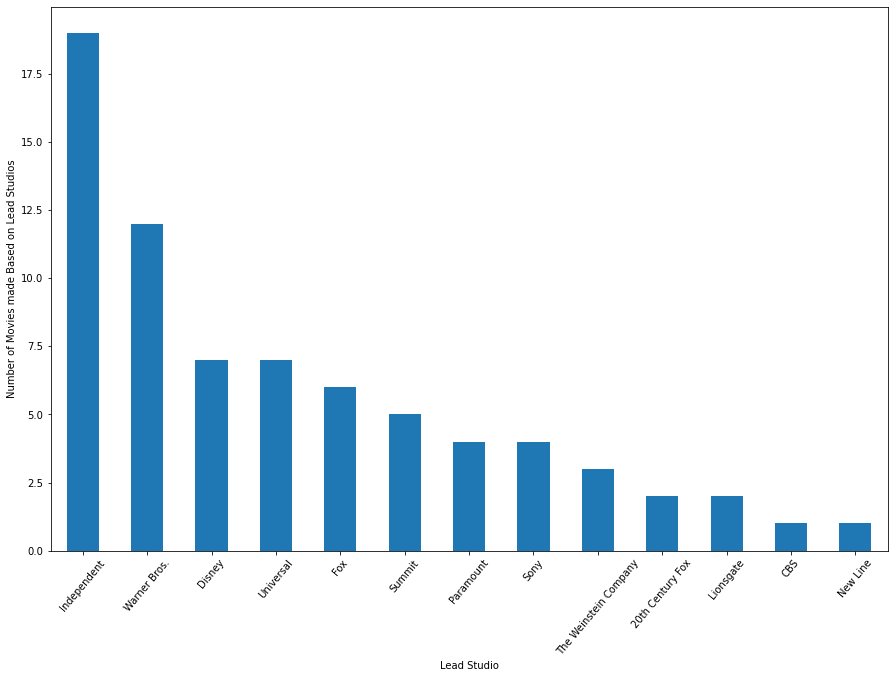

In [14]:
plt.figure(figsize=(15,10))
ls.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Lead Studio")
plt.ylabel("Number of Movies made Based on Lead Studios")
plt.show()